In [1]:
import numpy as np
import descent
import matplotlib.pyplot as plt
try:
    from ipywidgets import interact
except ImportError:
    from IPython.html.widgets import interact

plt.style.use(['ocean', 'seaborn-notebook'])
%matplotlib inline

# Logistic regression

First, we generate a toy problem instance:

In [2]:
# set the random seed
np.random.seed(1234)

# sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

M = 500  # number of training examples

X = np.random.randn(M,2)       # Features
W = np.array([0.25, -0.5])     # True weights
ytrue = sigmoid(X.dot(W))      # class probabilities

# noisy class labels
yobs = (ytrue + 0.1*np.random.randn(M)) > 0.5
yval = np.ones(yobs.size)*yobs - np.ones(yobs.size)*(~yobs)

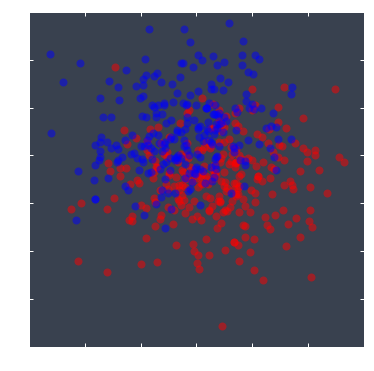

In [3]:
# plot the data and color them by the class label
plt.figure(figsize=(6,6))
plt.plot(X[yobs,0], X[yobs,1], 'ro', alpha=0.5, ms=8)
plt.plot(X[~yobs,0], X[~yobs,1], 'bo', alpha=0.5, ms=8)

The objective function for logistic regression is:

In [4]:
# Objective function for logistic regression
def f_df(theta, X=X, y=yval):
    expval = np.exp(-yval * X.dot(theta))
    
    objective = np.mean(np.log(1 + expval)) + 0.1 * np.linalg.norm(theta)**2
    gradient = np.mean((-yval * expval / (1 + expval)).reshape(-1,1) * X, axis=0) + 0.2*theta
    return objective, gradient

In [5]:
# Let's run gradient descent!
opt = descent.GradientDescent(np.zeros(2), f_df, 'adam', {'lr': 1e-2})
opt.run(1000)
#opt.theta

In [6]:
# check the correlation with the true weight vector
corr = np.inner(W, opt.theta)**2 / (np.inner(W,W) * np.inner(opt.theta, opt.theta))
print('Correlation with the true weight vector: {}'.format(corr))

Correlation with the true weight vector: 0.9965724221306104


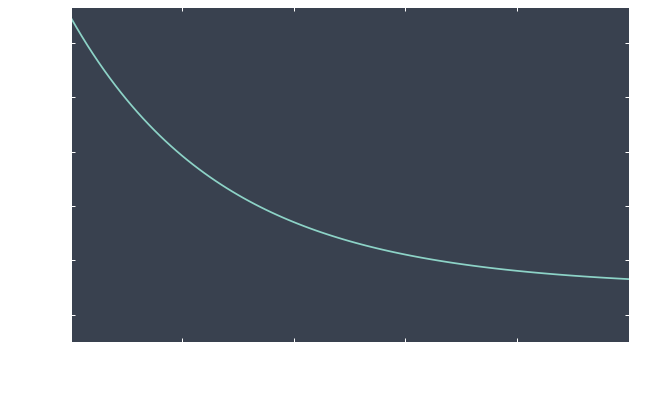

In [7]:
@interact(learning_rate=(0.001, 0.1, 0.01))
def train(learning_rate):
    plt.figure(figsize=(10,6))
    opt = descent.GradientDescent(np.zeros(2), f_df, 'sgd', {'lr': learning_rate})
    opt.run(100)
    plt.plot(opt.store['objective'])
    plt.ylim(0.57, 0.6932)
    plt.xlabel('Iteration $k$', fontsize=24)
    plt.ylabel('Objective $f(w_k)$', fontsize=24)

## Optimizers besides gradient descent

We can compare gradient descent to other algorithms:

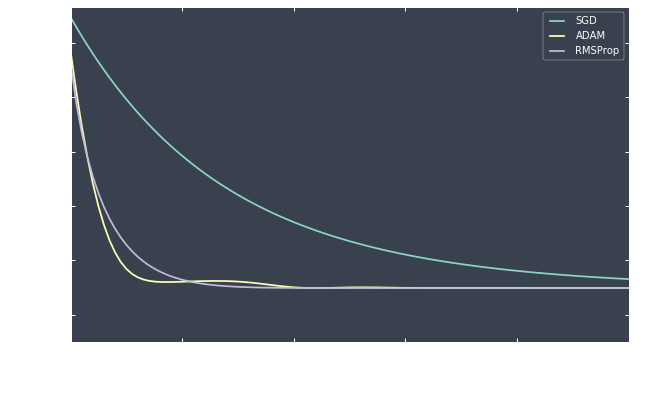

In [8]:
@interact(learning_rate=(0.001, 0.1, 0.01))
def train(learning_rate):
    
    options = {'lr': learning_rate}
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    
    for algorithm in ('sgd', 'adam', 'rmsprop'):
        opt = descent.GradientDescent(np.zeros(2), f_df, algorithm, options)
        opt.run(100)
        ax.plot(opt.store['objective'])
        ax.set_ylim(0.57, 0.6932)

    plt.legend(["SGD", "ADAM", "RMSProp"], loc="upper right",  frameon=True, fancybox=True)
    plt.xlabel('Iteration $k$', fontsize=24)
    plt.ylabel('Objective $f(w_k)$', fontsize=24)